In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32  # Define the batch size
desired_size = (224, 224)


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


# Adjust the directory paths to the preprocessed dataset
train_generator = train_datagen.flow_from_directory(
    directory='dataset',
    target_size=desired_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    directory='dataset',
    target_size=desired_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle= False
)


Found 7246 images belonging to 2 classes.
Found 1811 images belonging to 2 classes.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG19

# Load the pre-trained VGG19 Small model without the top layer
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to prevent it from being updated during the first phase of training
base_model.trainable = False

# Add custom layers on top of the VGG19 Small base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling to reduce feature maps to a single vector per map
x = Dense(1024, activation='relu')(x)  # Dense layer with relu activation
x = Dropout(0.3)(x)  # Dropout for regularization
x = Dense(512, activation='relu')(x)  # Additional dense layer with relu activation
x = Dropout(0.2)(x)  # Dropout for regularization
x = Dense(256, activation='relu')(x)  # Additional dense layer with relu activation
x = Dropout(0.1)(x)  # Dropout for regularization
predictions = Dense(2, activation='softmax')(x)  # Final output layer with softmax for 2 classes


# Construct the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Set the initial learning rate
initial_learning_rate = 0.001

# Compile the model
model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()




80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 21,206,338 (80.90 MB)

 Trainable params: 1,181,954 (4.51 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [3]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min', restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_VGG19.keras', monitor='val_loss', save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001, verbose=1)  # Adjust these parameters
tensorboard = TensorBoard(log_dir='logs')

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust based on your needs
    validation_data=validation_generator,
    # steps_per_epoch=train_generator.n // train_generator.batch_size,
    # validation_steps=validation_generator.n // validation_generator.batch_size,
     callbacks=[ early_stopping,model_checkpoint, reduce_lr]
    #callbacks=[ model_checkpoint, reduce_lr]

)

# Optionally, you can fine-tune the model further by unfreezing some of the top layers of the base model and retraining.

# Save the trained model with the '.keras' extension
model.save('VGG19_finetuned_model.keras')

Epoch 1/10


c:\Users\TakudzwaMupanesure\source\repos\vkr_proj\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


227/227 ━━━━━━━━━━━━━━━━━━━━ 600s 3s/step - accuracy: 0.7684 - loss: 0.5538 - val_accuracy: 0.7708 - val_loss: 0.5177 - learning_rate: 0.0010
Epoch 2/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 617s 3s/step - accuracy: 0.7774 - loss: 0.4777 - val_accuracy: 0.7742 - val_loss: 0.4874 - learning_rate: 0.0010
Epoch 3/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 615s 3s/step - accuracy: 0.7950 - loss: 0.4416 - val_accuracy: 0.7797 - val_loss: 0.4911 - learning_rate: 0.0010
Epoch 4/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 647s 3s/step - accuracy: 0.7910 - loss: 0.4422 - val_accuracy: 0.7841 - val_loss: 0.4794 - learning_rate: 0.0010
Epoch 5/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 616s 3s/step - accuracy: 0.8023 - loss: 0.4256 - val_accuracy: 0.7736 - val_loss: 0.4760 - learning_rate: 0.0010
Epoch 6/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 592s 3s/step - accuracy: 0.8007 - loss: 0.4258 - val_accuracy: 0.7863 - val_loss: 0.4902 - learning_rate: 0.0010
Epoch 7/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 621s 3s/step - accuracy: 0.8124 - loss: 0.4202 - val_

In [5]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min', restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_sofar_VGG19.keras', monitor='val_loss', save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001, verbose=1)  # Adjust these parameters
# Unfreeze some top layers of the base model
base_model.trainable = True
fine_tune_at = 100  # This is an example value; adjust based on your model's architecture
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training
model.fit(
    train_generator,
    epochs=10,  # Adjust based on your needs
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Save the trained model with the '.keras' extension
model.save('VGG19_finetuned_model.keras')


Epoch 1/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 618s 3s/step - accuracy: 0.8150 - loss: 0.4084 - val_accuracy: 0.7880 - val_loss: 0.4719 - learning_rate: 1.0000e-05
Epoch 2/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 591s 3s/step - accuracy: 0.8156 - loss: 0.4040 - val_accuracy: 0.7902 - val_loss: 0.4686 - learning_rate: 1.0000e-05
Epoch 3/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 639s 3s/step - accuracy: 0.8210 - loss: 0.3979 - val_accuracy: 0.7891 - val_loss: 0.4685 - learning_rate: 1.0000e-05
Epoch 4/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 658s 3s/step - accuracy: 0.8203 - loss: 0.4080 - val_accuracy: 0.7824 - val_loss: 0.4790 - learning_rate: 1.0000e-05
Epoch 5/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 647s 3s/step - accuracy: 0.8244 - loss: 0.3987 - val_accuracy: 0.7830 - val_loss: 0.4764 - learning_rate: 1.0000e-05
Epoch 6/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 613s 3s/step - accuracy: 0.8260 - loss: 0.3908 - val_accuracy: 0.7813 - val_loss: 0.4746 - learning_rate: 1.0000e-05
Epoch 6: early stopping
Restoring model weights from the e

In [37]:
from tensorflow.keras.models import load_model

# Assuming your model is saved under 'best_model.keras'
model = load_model('best_model_sofar_VGG19.keras')


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32  # Adjust to your preference
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory='test_dataset_processed',
    target_size=(224, 224),  # Ensure this matches your model's expected input
    batch_size=batch_size,
    class_mode='categorical',  # or 'binary' for binary classification
    shuffle=False  # Important for confusion matrix
)


Found 1090 images belonging to 2 classes.


In [39]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


35/35 ━━━━━━━━━━━━━━━━━━━━ 31s 814ms/step - accuracy: 0.6740 - loss: 0.6372
Test Loss: 0.4341488182544708
Test Accuracy: 0.7981651425361633


c:\Users\TakudzwaMupanesure\source\repos\vkr_proj\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 326 variables whereas the saved optimizer has 122 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


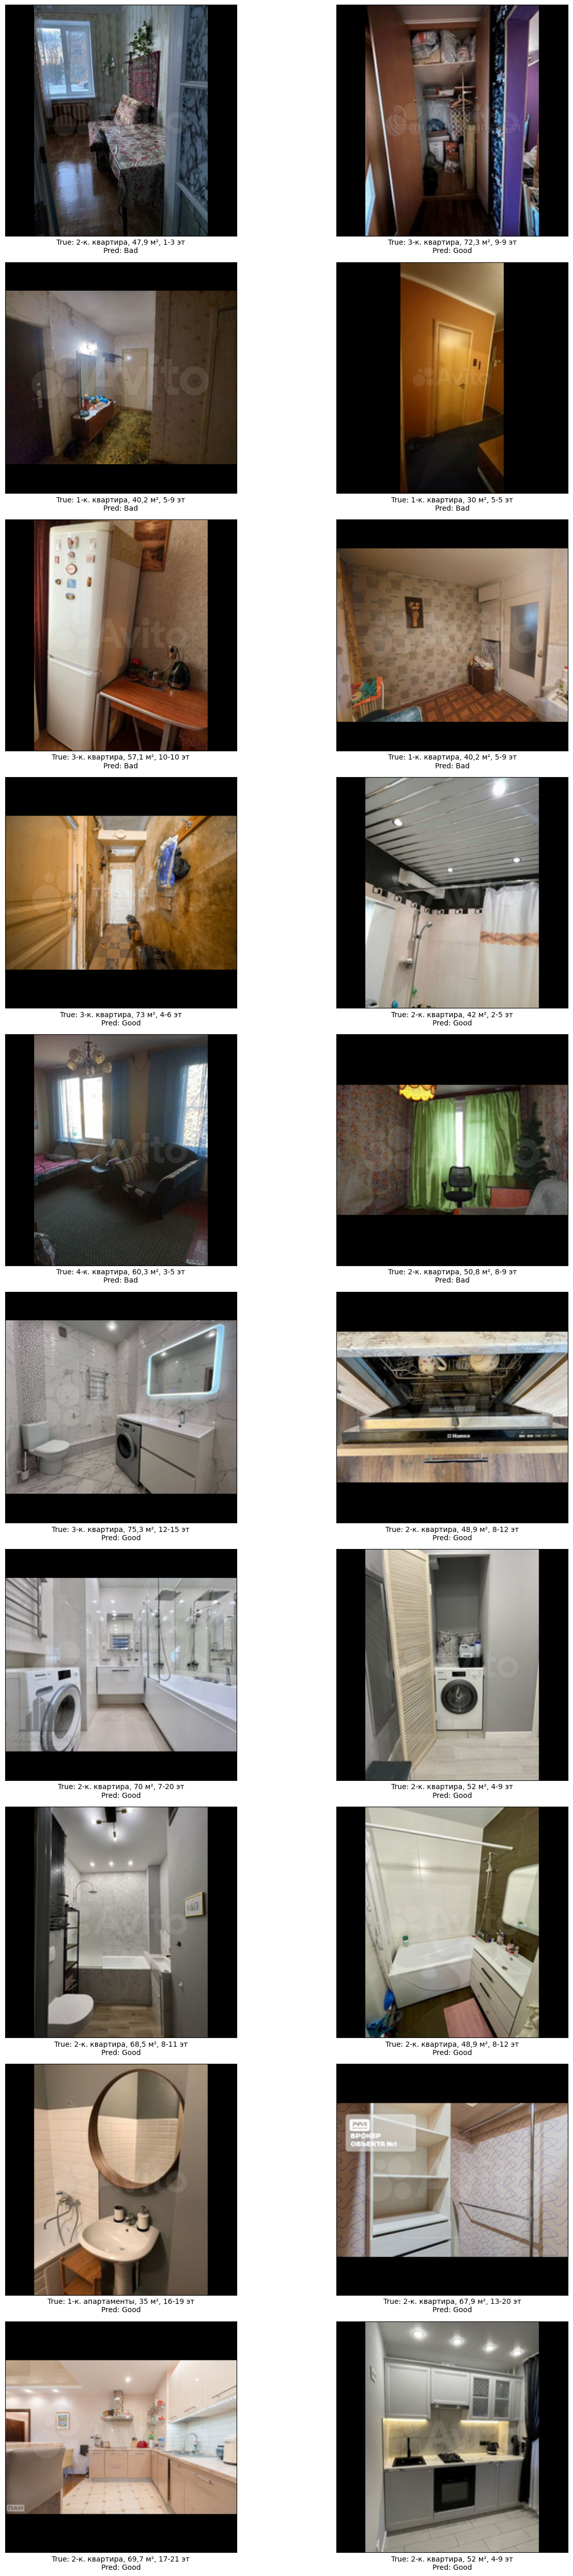

In [32]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Assuming the model is saved and can be loaded
model = load_model('best_model_sofar.keras')

def load_and_prepare_image(image_path, target_size=(224, 224)):
    """Load an image from file and prepare it for prediction."""
    image = Image.open(image_path)
    image = image.resize(target_size)
    image_array = np.array(image) / 255.0  # Scale image
    return np.expand_dims(image_array, axis=0)  # Add batch dimension

def predict_and_display_images_from_folders(base_path, model, num_images=10):
    """Automatically select and display predictions for images from test dataset folders."""
    categories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
    selected_images = []
    for category in categories:
        # Fetch all png images from all subdirectories of the category
        image_paths = glob.glob(os.path.join(base_path, category, '**', '*.png'), recursive=True)
        if not image_paths:
            print(f"No images found in {os.path.join(base_path, category)}. Skipping this category.")
            continue
        # Ensure there are enough images to select from
        num_to_select = min(num_images // len(categories), len(image_paths))
        selected_images.extend(np.random.choice(image_paths, size=num_to_select, replace=False))

    plt.figure(figsize=(15, num_images // 2 * 5))
    for i, image_path in enumerate(selected_images):
        image = load_and_prepare_image(image_path)
        prediction = model.predict(image)
        predicted_class = np.argmax(prediction, axis=1)[0]
        true_label = os.path.basename(os.path.dirname(image_path))  # This gets the immediate parent directory name

        plt.subplot(len(selected_images) // 2, 2, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.squeeze(image), cmap='gray')
        plt.xlabel(f"True: {true_label}\nPred: {'Good' if predicted_class == 1 else 'Bad'}")
    plt.tight_layout()
    plt.show()

# Path to your test dataset
test_dataset_path = 'test_dataset_processed'
predict_and_display_images_from_folders(test_dataset_path, model, num_images=20)
